In [101]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [102]:
data = pd.read_csv('../dataSet/breast_cancer_data.csv')

In [103]:
data.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [104]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [105]:
data.shape

(569, 33)

In [106]:
data.columns 

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

Text(0, 0.5, 'Frequency')

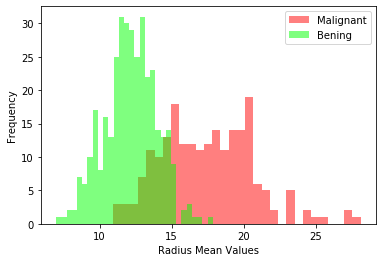

In [107]:
m = plt.hist(data[data["diagnosis"] == "M"].radius_mean,ls='dotted',bins=30,fc = (1,0,0,0.5),label = "Malignant")
b = plt.hist(data[data["diagnosis"] == "B"].radius_mean,bins=30,fc = (0,1,0,0.5),label = "Bening")
plt.legend()
plt.xlabel("Radius Mean Values")
plt.ylabel("Frequency")

In [108]:
frequent_malignant_radius_mean = m[0].max()
print(m[0])
frequent_malignant_radius_mean

[ 3.  3.  3.  7. 11. 10. 13. 18. 12. 12. 11. 12. 14. 11. 14. 14. 19.  6.
  5.  2.  0.  5.  0.  2.  1.  1.  0.  0.  2.  1.]


19.0

In [109]:
from scipy import stats
stats.mode(data['radius_mean'])

ModeResult(mode=array([12.34]), count=array([4]))

In [110]:
np.median(data['radius_mean'])

13.37

In [111]:
#radius mean of malignant tumors are bigger than radius mean of bening tumors mostly.
#bell-shaped that is shape of normal distribution (gaussian distribution)
#While looking histogram as yok can see there are rare values in bening distribution (green in graph)
#There values can be errors or rare events.
#These errors and rare events can be called outliers.
#Calculating outliers:
#first we need to calculate first quartile (Q1)(25%)
#then find IQR(inter quartile range) = Q3-Q1
#finally compute Q1 - 1.5IQR and Q3 + 1.5IQR
#Anything outside this range is an outlier
#lets write the code for bening tumor distribution for feature radius mean
#The interquartile range is often used to find outliers in data. 
#Outliers here are defined as observations that fall below Q1 − 1.5 IQR or above Q3 + 1.5 IQR.
#In a boxplot, the highest and lowest occurring value within this limit are indicated by whiskers 
#of the box (frequently with an additional bar at the end of the whisker) and any outliers as individual points.
data_bening = data[data["diagnosis"] == "B"]
data_malignant = data[data["diagnosis"] == "M"]
desc = data_bening.radius_mean.describe()
desc



count    357.000000
mean      12.146524
std        1.780512
min        6.981000
25%       11.080000
50%       12.200000
75%       13.370000
max       17.850000
Name: radius_mean, dtype: float64

In [112]:
Q1 = desc[4]
Q3 = desc[6]
IQR = Q3-Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

In [113]:
print('ranged outliers {},{}'.format(lower_bound,upper_bound))

ranged outliers 7.645000000000001,16.805


In [114]:
print('outliers',data_bening[ (data_bening.radius_mean<lower_bound) | (data_bening.radius_mean>upper_bound)].radius_mean.values)

outliers [ 6.981 16.84  17.85 ]


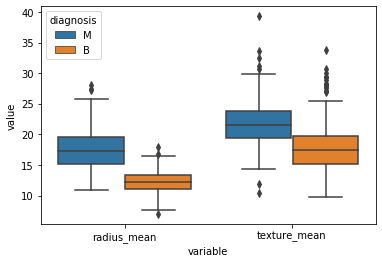

In [115]:
melted_data = pd.melt(data,id_vars = "diagnosis",value_vars = ['radius_mean', 'texture_mean'])

sns.boxplot(x = "variable", y = "value", hue="diagnosis",data= melted_data)

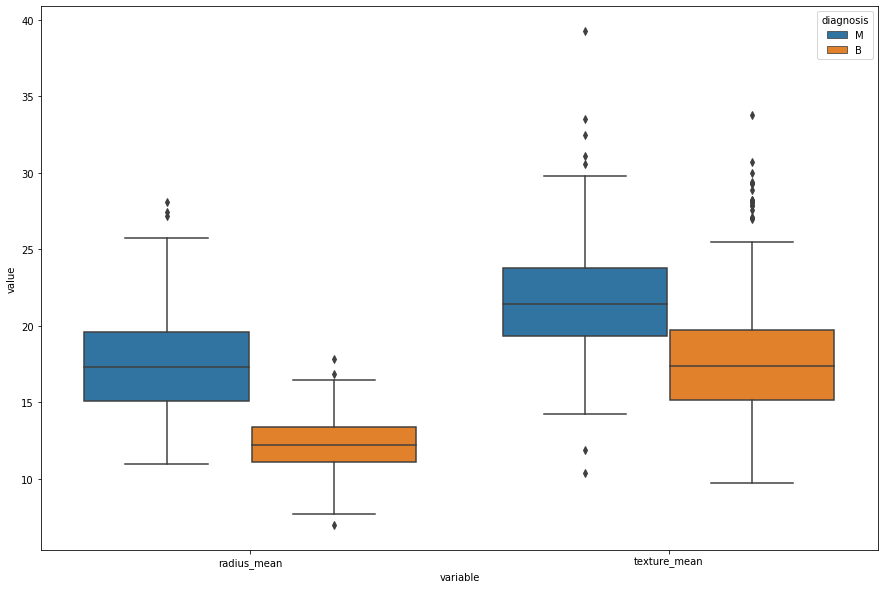

In [116]:
#3 outlier in bening radius mean and in box plot there are 3 outlier.
melted_data = pd.melt(data,id_vars = "diagnosis",value_vars = ['radius_mean', 'texture_mean'])
plt.figure(figsize = (15,10))
sns.boxplot(x = "variable", y = "value", hue="diagnosis",data= melted_data)
plt.show()

In [117]:
print("mean: ",data_bening.radius_mean.mean())
print("variance: ",data_bening.radius_mean.var())
print("standart deviation (std): ",data_bening.radius_mean.std())
print("describe method: ",data_bening.radius_mean.describe())

mean:  12.14652380952381
variance:  3.170221722043872
standart deviation (std):  1.7805116461410389
describe method:  count    357.000000
mean      12.146524
std        1.780512
min        6.981000
25%       11.080000
50%       12.200000
75%       13.370000
max       17.850000
Name: radius_mean, dtype: float64


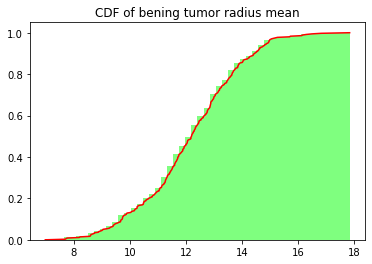

In [118]:
#P(12 < X)? The answer is 0.5. The probability that the variable takes a values less than or
#equal to 12(radius mean) is 0.5.
#Cumulative distribution function is the probability that the variable takes a value less than or equal to x.
#P(X <= x)
plt.hist(data_bening.radius_mean,bins=50,fc=(0,1,0,0.5),label='Bening',density = True,cumulative = True)
sorted_data = np.sort(data_bening.radius_mean)
y = np.arange(len(sorted_data))/float(len(sorted_data)-1)
plt.plot(sorted_data,y,color='red')
plt.title('CDF of bening tumor radius mean')
plt.show()


In [119]:
#Effect size is a statistical concept that measures the strength of the relationship between two variables on 
#a numeric scale.  For instance, if we have data on the height of men and women and we notice that, on average,
#men are taller than women, the difference between the height of men and the height of women is known as
#the effect size.  The greater the effect size, the greater the height difference between men and women will be. 
#Statistic effect size helps us in determining if the difference is real or if it is due to a change of factors. 
#In hypothesis testing, effect size, power, sample size, and critical significance level are related to each other. 

#Types of effect size
#Pearson r correlation:it is most widely used in statistics,varies between -1 to +1.  
#Cohen’s d effect size: Cohen’s d is known as the difference of two population means and
#it is divided by the standard deviation from the data
#many others

#Cohen suggest that if d(effect size)= 0.2, it is small effect size, d = 0.5 medium effect size,
#d = 0.8 large effect size.
#lets compare size of the effect between bening radius mean and malignant radius mean
#Effect size is 2.2 that is too big and says that two groups are different from each other as we expect.
#Because our groups are bening radius mean and malignant radius mean that are different from each other
mean_diff = data_malignant.radius_mean.mean() - data_bening.radius_mean.mean()
var_bening = data_bening.radius_mean.var()
var_malignant = data_malignant.radius_mean.var()
var_pooled = (len(data_bening)*var_bening +len(data_malignant)*var_malignant ) / float(len(data_bening)+ len(data_malignant))
effect_size = mean_diff/np.sqrt(var_pooled)
print("Effect size: ",effect_size)

Effect size:  2.2048585165041428


<Figure size 1080x720 with 0 Axes>

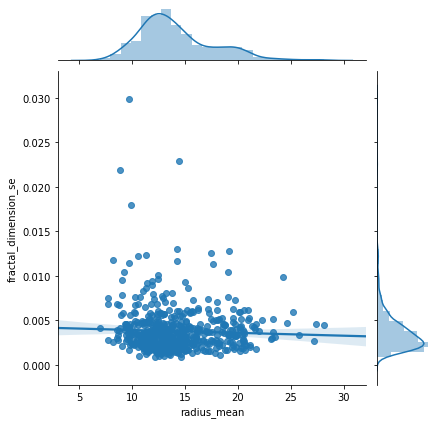

In [120]:
plt.figure(figsize = (15,10))
sns.jointplot(data.radius_mean,data.fractal_dimension_se,kind="regg")
plt.show()
#no correlation between it

<Figure size 1080x720 with 0 Axes>

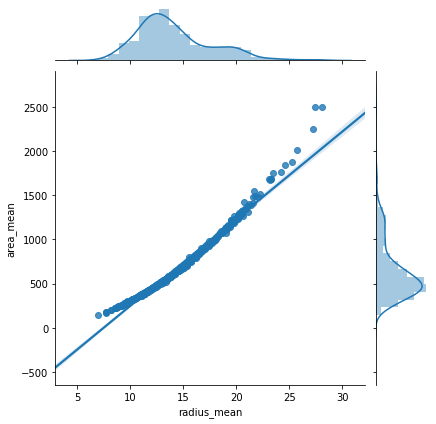

In [121]:
plt.figure(figsize = (15,10))
sns.jointplot(data.radius_mean,data.area_mean,kind="regg")
plt.show()

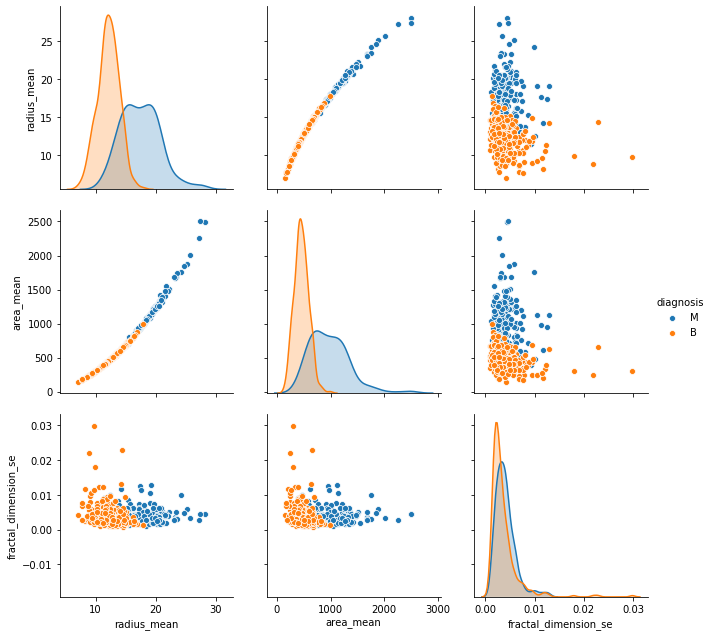

In [122]:
# Also we can look relationship between more than 2 distribution
df = data.loc[:,["radius_mean","area_mean","fractal_dimension_se","diagnosis"]]
sns.pairplot(df, hue="diagnosis", height=3);

Figure(1296x1296) AxesSubplot(0.125,0.125;0.775x0.755)


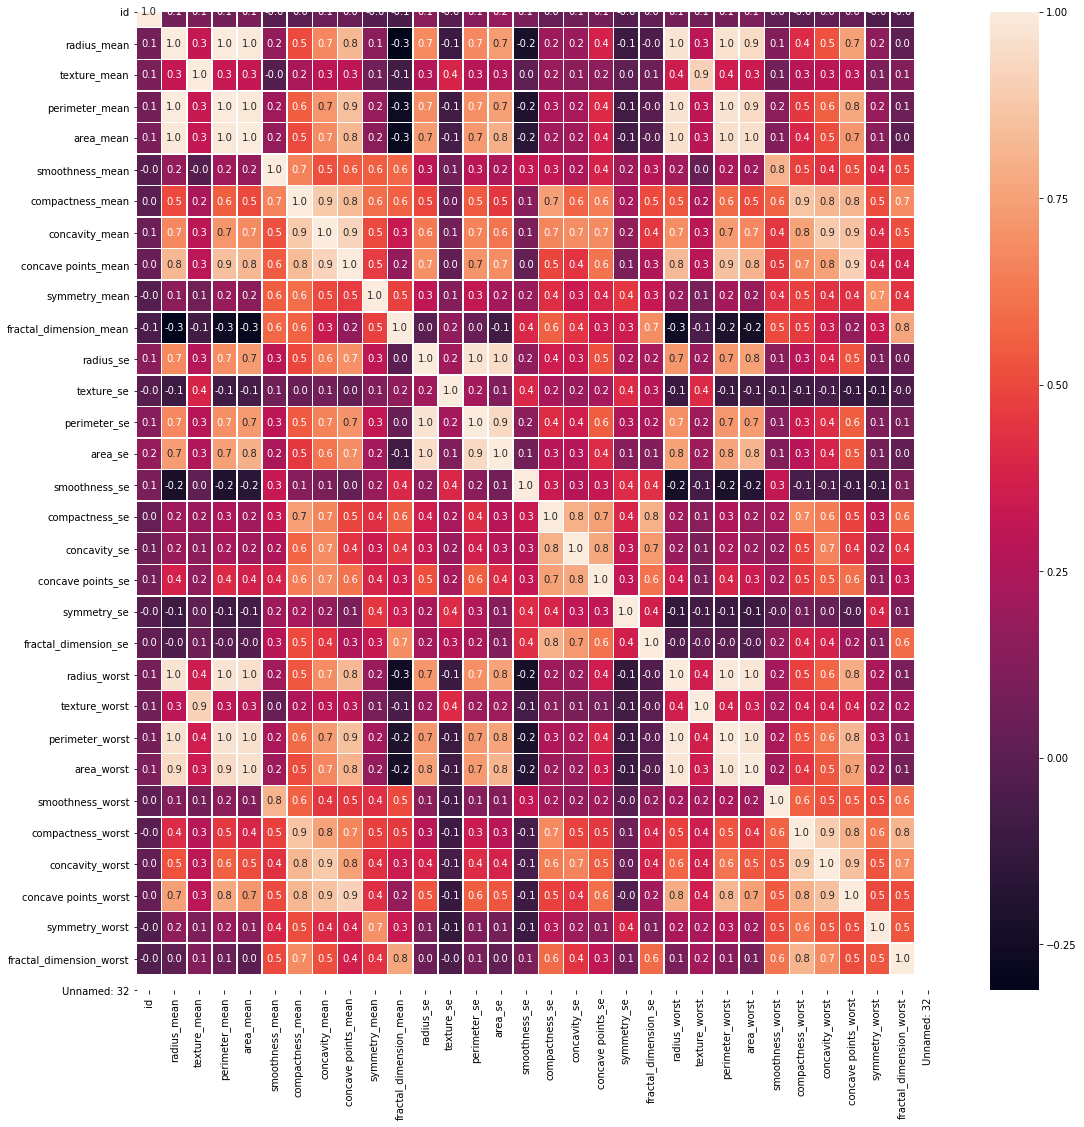

In [123]:
#Correlation
#Strength of the relationship between two variables
f,ax=plt.subplots(figsize = (18,18))
print(f,ax)
sns.heatmap(data.corr(),annot= True,linewidths=0.5,fmt = ".1f" ,ax=ax)

In [124]:
#Meaning of 1 is two variable are positively correlated with each other like radius mean and area mean
#Meaning of zero is there is no correlation between variables like radius mean and fractal dimension se
#Meaning of -1 is two variables are negatively correlated with each other



#Covariance
#Covariance is measure of the tendency of two variables to vary together
#So covariance is maximized if two vectors are identical
#Covariance is zero if they are orthogonal.
#Covariance is negative if they point in opposite direction
#correlation takes place between -1 and +1. Conversely, the value of covariance lies between -∞ and +∞.
#Covariance is affected by the change in scale but correlation not
#correlation show whether and how strongly pairs of variables are related to each other.

print("Covariance between radius mean and area mean: ",data.radius_mean.cov(data.area_mean))
print("Covariance between radius mean and fractal dimension se: ",data.radius_mean.cov(data.fractal_dimension_se))

Covariance between radius mean and area mean:  1224.4834093464565
Covariance between radius mean and fractal dimension se:  -0.0003976248576440626


In [125]:
#Pearson Correlation --- > . (cov(A,B)/(std(A)*std(B)))
p1 = data.loc[:,["area_mean","radius_mean"]].corr(method= "pearson")
p2 = data.radius_mean.cov(data.area_mean)/(data.radius_mean.std()*data.area_mean.std())
print('Pearson correlation: ')
print(p1)
print('Pearson correlation: ',p2)

Pearson correlation: 
             area_mean  radius_mean
area_mean     1.000000     0.987357
radius_mean   0.987357     1.000000
Pearson correlation:  0.9873571700566128


In [126]:
#Spearman's Rank Correlation
#Pearson correlation works well if the relationship between variables are linear and variables are roughly normal.
#But it is not robust, if there are outliers
#To compute spearman's correlation we need to compute rank of each value
#of relationship between distributions are non linear, spearman's correlation tends
#to better estimate the strength of relationship



#null hypothesis that is model of the system based on the assumption that the apparent effect is not real.
#A null hypothesis is a type of hypothesis used in statistics that proposes that no statistical significance exists
#eg. null hypothesis new medicine works as old, old product sale is same
#in a set of given observations. The null hypothesis is a hypothesis which people tries to disprove it. 
#Alternative hypothesis is a hypothesis which people want to tries to prove it.


#example:
#I want to learn that are radius mean and area mean related with each other? My null hypothesis is that 
#"relationship between radius mean and area mean is zero in tumor population'.
#Now we need to refute this null hypothesis in order to demonstrate that radius mean and area mean are related. 
#(actually we know it from our previous experiences)
#lets find p-value (probability value)
#https://towardsdatascience.com/hypothesis-testing-the-what-why-and-how-867d382b99ca
#new website crap or good example to test customer like or not then take hypothesis that website crap then threshold like average traffice with that webstite then z test and get p value
statistic, p_value = stats.ttest_rel(data.radius_mean,data.area_mean)
print('p-value: ',p_value)


#P values is almost zero so we can reject null hypothesis.


p-value:  1.5253492492559045e-184


Standard Normal Variate(Z) ==> Z test :: 
A Z-score measures how many standard deviations above or below the mean a data point is. It is calculated as,
z=x−μ/σ
 
Positive Z-score → Data point is above the mean
Negative Z-score → Data point is below the mean
Close to zero → Data point is close to the mean

normal gaussian distribution and AUC
Normal distribution is a continuous probability distribution that describes many natural datasets. It is also known as bell curve or Gaussian distribution. We see many natural examples that are closer to a normal distribution.

Heights of people

Binomial distribution¶
The probability distribution of a binomial variable is called Binomial distribution

Bernoulli distribution
Bernoulli distribution is a discrete probability distribution of a random variable which has only two outcomes ("success" or a "failure"). 
ExpectedValue:E[X]=p
 
Variance:σ square=p*(1−p)
Standarddeviation:σ=√p(1−p)

A Bernoulli distribution is a special case of binomial distribution. Specifically, when 𝑛=1 the binomial distribution becomes Bernoulli distribution.

uniform distribution

NOTE:
null distribution : when nul hypothesis is true that distribution